In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
file_path = './economic-indicators.csv'
df = pd.read_csv(file_path)
data=df

In [3]:
df.head()

,Year,Month,logan_passengers,logan_intl_flights,hotel_occup_rate,hotel_avg_daily_rate,total_jobs,unemp_rate,labor_force_part_rate,pipeline_unit,pipeline_total_dev_cost,pipeline_sqft,pipeline_const_jobs,foreclosure_pet,foreclosure_deeds,med_housing_price,housing_sales_vol,new_housing_const_permits,new-affordable_housing_permits
0,2013,1,2019662,2986,0.572,158.93,322957,0.066,0.631,329,80000000.0,313107,228,44,11,380000,405,534,134
1,2013,2,1878731,2587,0.645,165.50,324295,0.060,0.629,557,360700000.0,885681,809,50,10,359500,332,196,13
2,2013,3,2469155,3250,0.819,187.45,325597,0.058,0.631,127,10550000.0,106386,128,6,6,400000,479,12,0
3,2013,4,2551246,3408,0.855,233.44,326101,0.058,0.632,325,150000000.0,350000,254,14,8,403000,558,91,24
4,2013,5,2676291,3240,0.858,237.89,325160,0.063,0.633,122,222200000.0,457374,402,12,4,425500,809,63,0


In [4]:
df.columns

Index(['Year', 'Month', 'logan_passengers', 'logan_intl_flights',
       'hotel_occup_rate', 'hotel_avg_daily_rate', 'total_jobs', 'unemp_rate',
       'labor_force_part_rate', 'pipeline_unit', 'pipeline_total_dev_cost',
       'pipeline_sqft', 'pipeline_const_jobs', 'foreclosure_pet',
       'foreclosure_deeds', 'med_housing_price', 'housing_sales_vol',
       'new_housing_const_permits', 'new-affordable_housing_permits'],
      dtype='object')

In [6]:
df.describe()

,Year,Month,logan_passengers,logan_intl_flights,hotel_occup_rate,hotel_avg_daily_rate,total_jobs,unemp_rate,labor_force_part_rate,pipeline_unit,pipeline_total_dev_cost,pipeline_sqft,pipeline_const_jobs,foreclosure_pet,foreclosure_deeds,med_housing_price,housing_sales_vol,new_housing_const_permits,new-affordable_housing_permits
count,84.000000,84.000000,8.400000e+01,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,8.400000e+01,8.400000e+01,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,2016.000000,6.500000,3.015647e+06,3940.511905,0.817738,244.423929,355989.202381,0.040429,0.646000,468.952381,4.804817e+08,9.925375e+05,801.726190,13.226190,3.773810,167327.845238,269.607143,132.892857,23.130952
std,2.012012,3.472786,5.492766e+05,694.479496,0.108631,49.763225,20682.654613,0.012743,0.013696,455.771606,5.415084e+08,9.512743e+05,795.160124,18.473264,4.934148,221099.042608,496.684817,216.830344,45.644720
min,2013.000000,1.000000,1.878731e+06,2587.000000,0.572000,157.890000,322957.000000,0.020000,0.626000,-54.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,3.750000,2.604905e+06,3408.000000,0.768500,187.367500,341119.000000,0.030750,0.634000,134.750000,1.125000e+08,3.460152e+05,278.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,6.500000,3.018654e+06,3960.500000,0.877500,250.280000,352823.000000,0.038000,0.643500,327.000000,2.834794e+08,6.841545e+05,557.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2018.000000,9.250000,3.413058e+06,4516.250000,0.901250,287.050000,370464.000000,0.050000,0.656250,645.000000,6.434358e+08,1.259489e+06,1031.750000,24.250000,8.000000,446250.000000,450.750000,254.000000,26.750000
max,2019.000000,12.000000,4.120937e+06,5260.000000,0.931000,337.920000,392536.000000,0.070000,0.676000,2026.000000,2.755500e+09,4.714445e+06,3976.000000,69.000000,17.000000,517750.000000,2508.000000,897.000000,232.000000


In [7]:
# Compute basic statistics and skewness for each column
basic_stats = df.describe()
skewness = df.skew()

# Combine both results for a comprehensive overview
stats_and_skewness = pd.concat([basic_stats, skewness.rename('skewness')], axis=0)
stats_and_skewness

,Year,Month,logan_passengers,logan_intl_flights,hotel_occup_rate,hotel_avg_daily_rate,total_jobs,unemp_rate,labor_force_part_rate,pipeline_unit,pipeline_total_dev_cost,pipeline_sqft,pipeline_const_jobs,foreclosure_pet,foreclosure_deeds,med_housing_price,housing_sales_vol,new_housing_const_permits,new-affordable_housing_permits,0
count,84.000000,84.000000,8.400000e+01,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,8.400000e+01,8.400000e+01,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,NaN
mean,2016.000000,6.500000,3.015647e+06,3940.511905,0.817738,244.423929,355989.202381,0.040429,0.646000,468.952381,4.804817e+08,9.925375e+05,801.726190,13.226190,3.773810,167327.845238,269.607143,132.892857,23.130952,NaN
std,2.012012,3.472786,5.492766e+05,694.479496,0.108631,49.763225,20682.654613,0.012743,0.013696,455.771606,5.415084e+08,9.512743e+05,795.160124,18.473264,4.934148,221099.042608,496.684817,216.830344,45.644720,NaN
min,2013.000000,1.000000,1.878731e+06,2587.000000,0.572000,157.890000,322957.000000,0.020000,0.626000,-54.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2014.000000,3.750000,2.604905e+06,3408.000000,0.768500,187.367500,341119.000000,0.030750,0.634000,134.750000,1.125000e+08,3.460152e+05,278.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,2016.000000,6.500000,3.018654e+06,3960.500000,0.877500,250.280000,352823.000000,0.038000,0.643500,327.000000,2.834794e+08,6.841545e+05,557.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,2018.000000,9.250000,3.413058e+06,4516.250000,0.901250,287.050000,370464.000000,0.050000,0.656250,645.000000,6.434358e+08,1.259489e+06,1031.750000,24.250000,8.000000,446250.000000,450.750000,254.000000,26.750000,NaN
max,2019.000000,12.000000,4.120937e+06,5260.000000,0.931000,337.920000,392536.000000,0.070000,0.676000,2026.000000,2.755500e+09,4.714445e+06,3976.000000,69.000000,17.000000,517750.000000,2508.000000,897.000000,232.000000,NaN
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
Month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


Trend Analysis Visualization:


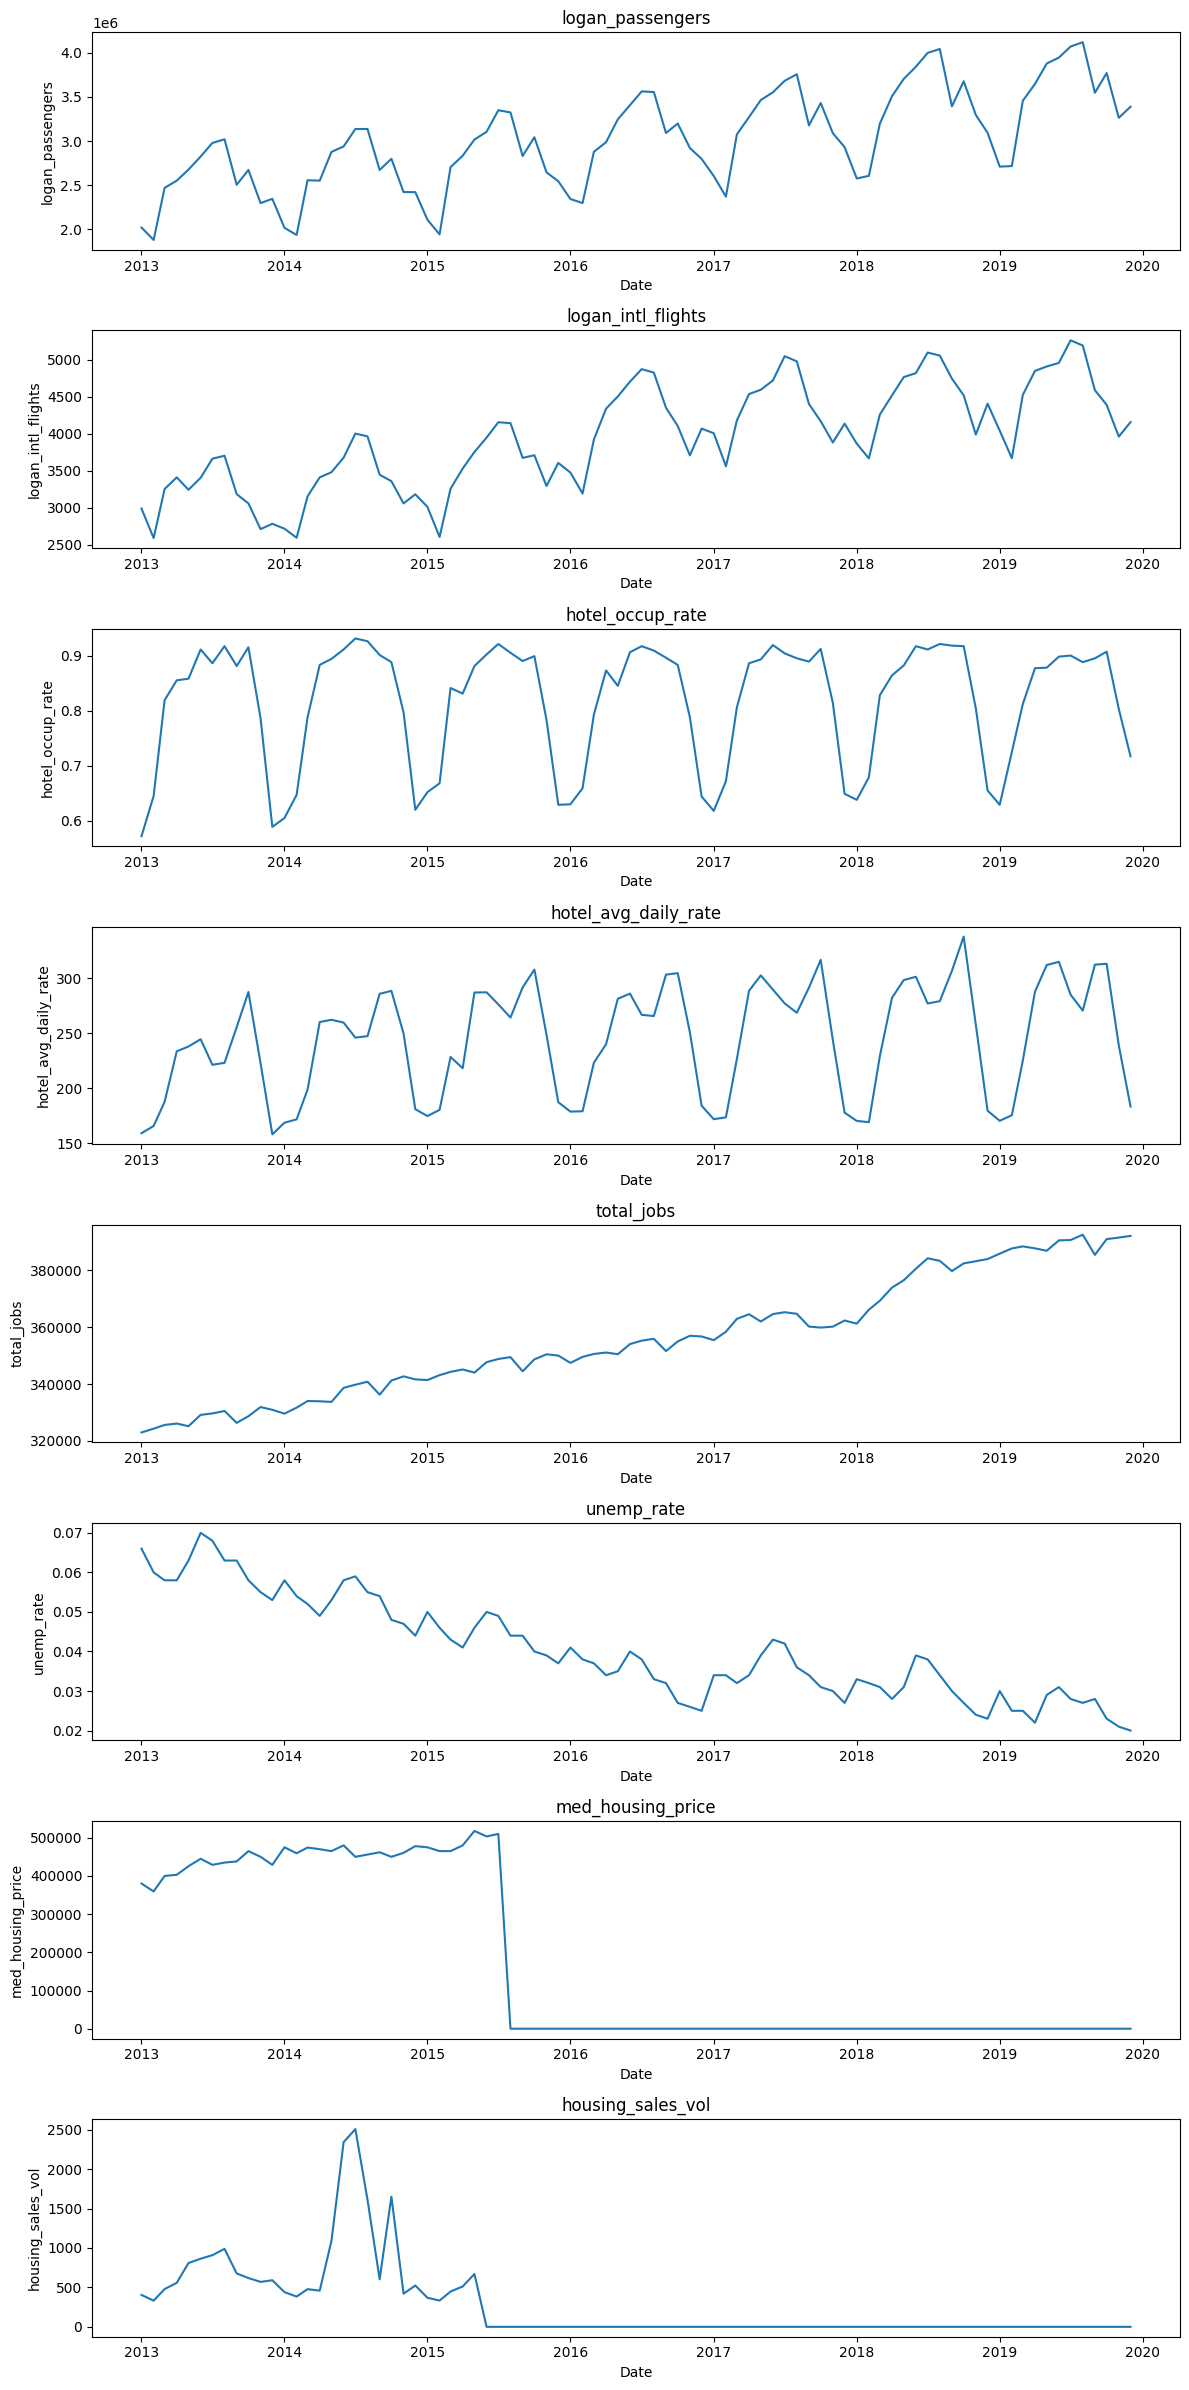

In [8]:
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
df.set_index('Date', inplace=True)

# Trend Analysis
trend_analysis_columns = ['logan_passengers', 'logan_intl_flights', 'hotel_occup_rate', 
                          'hotel_avg_daily_rate', 'total_jobs', 'unemp_rate', 
                          'med_housing_price', 'housing_sales_vol']
print("Trend Analysis Visualization:")
fig, axes = plt.subplots(len(trend_analysis_columns), 1, figsize=(12, 24))
for i, col in enumerate(trend_analysis_columns):
    sns.lineplot(data=df, x=df.index, y=col, ax=axes[i]).set_title(col)
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('Date')

plt.tight_layout()
plt.show()


Correlation Analysis Visualization:


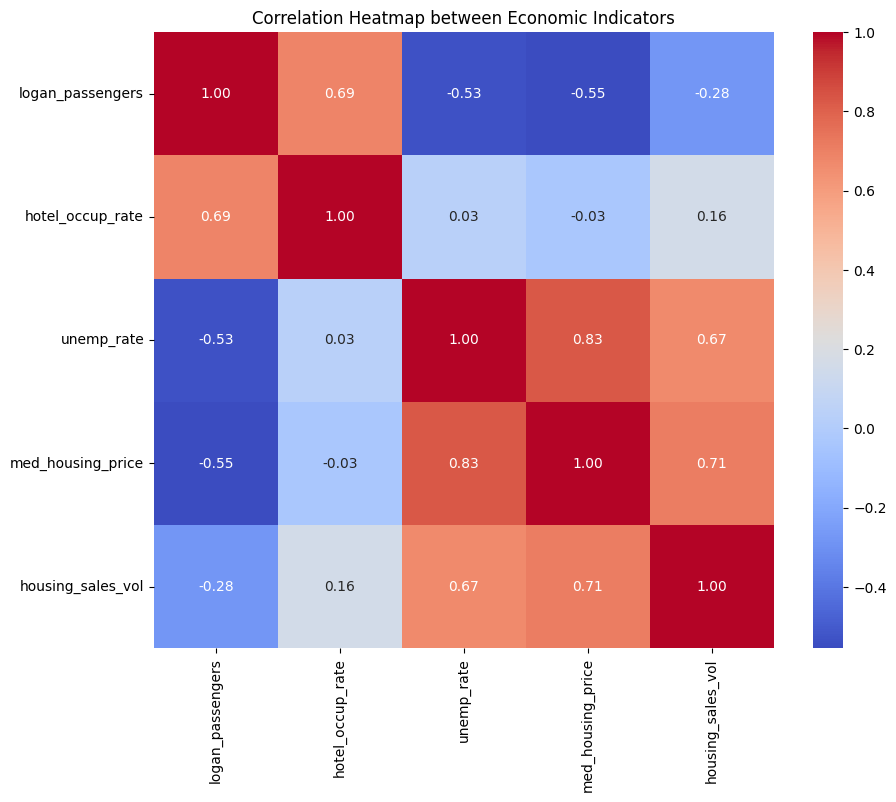

In [9]:
# Correlation Analysis
correlation_columns = ['logan_passengers', 'hotel_occup_rate', 'unemp_rate', 
                       'med_housing_price', 'housing_sales_vol']
correlation_df = df[correlation_columns]
# Correlation Analysis Visualization
print("Correlation Analysis Visualization:")
plt.figure(figsize=(10, 8))
correlation_heatmap = sns.heatmap(correlation_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
correlation_heatmap.set_title('Correlation Heatmap between Economic Indicators')
plt.show()



In [10]:
# Predictive Modeling: Forecasting Median Housing Prices
X = df[['unemp_rate', 'logan_passengers', 'total_jobs']] # Predictor variables
y = df['med_housing_price'] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
y_pred = lin_reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(13879529940.530048, 0.7215199380342323)

In [11]:
# Seasonality Analysis: Hotel Occupancy Rate
seasonal_data = df['hotel_occup_rate']
decomposition = seasonal_decompose(seasonal_data, model='additive', period=12)
mse, r2

(13879529940.530048, 0.7215199380342323)

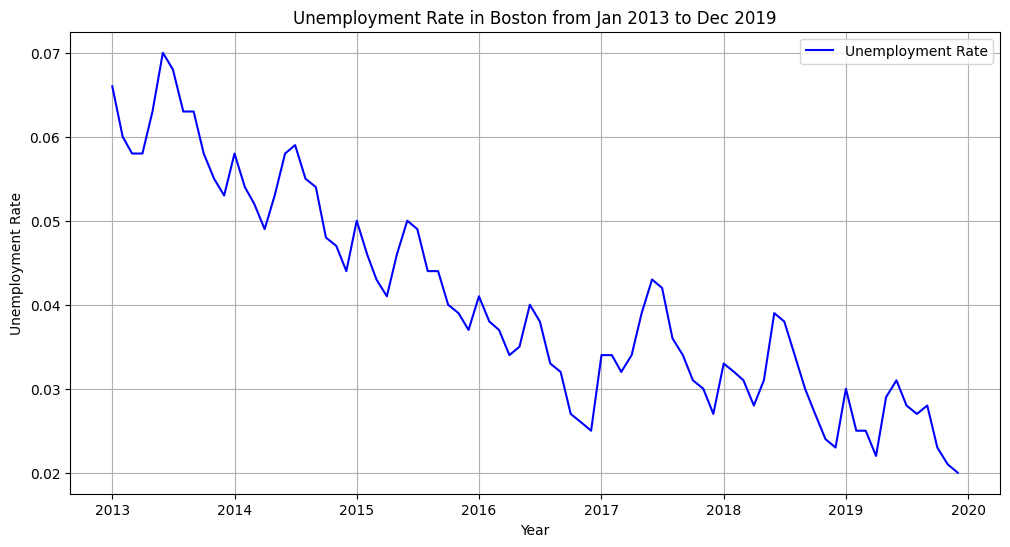

0.8285195479394816

In [12]:
# Convert 'Year' and 'Month' into a single datetime column for easier analysis
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

# Plotting the trend of unemployment rate over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['unemp_rate'], label='Unemployment Rate', color='blue')
plt.title('Unemployment Rate in Boston from Jan 2013 to Dec 2019')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.legend()
plt.show()

# Calculating the correlation between unemployment rate and median housing prices
correlation = df['unemp_rate'].corr(df['med_housing_price'])
correlation


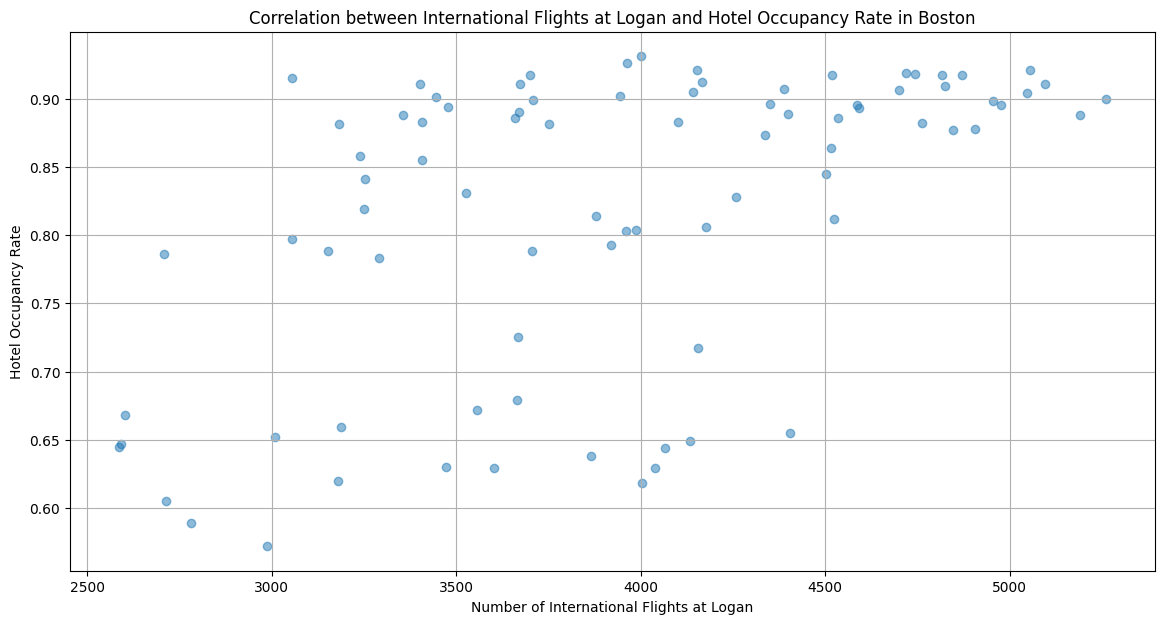

0.5280505312492918

In [13]:
# Calculating the correlation between the number of international flights at Logan and the hotel occupancy rate
correlation_flights_hotel = df['logan_intl_flights'].corr(df['hotel_occup_rate'])

# Plotting the two variables for visual analysis
plt.figure(figsize=(14, 7))
plt.scatter(df['logan_intl_flights'], df['hotel_occup_rate'], alpha=0.5)
plt.title('Correlation between International Flights at Logan and Hotel Occupancy Rate in Boston')
plt.xlabel('Number of International Flights at Logan')
plt.ylabel('Hotel Occupancy Rate')
plt.grid(True)
plt.show()

correlation_flights_hotel


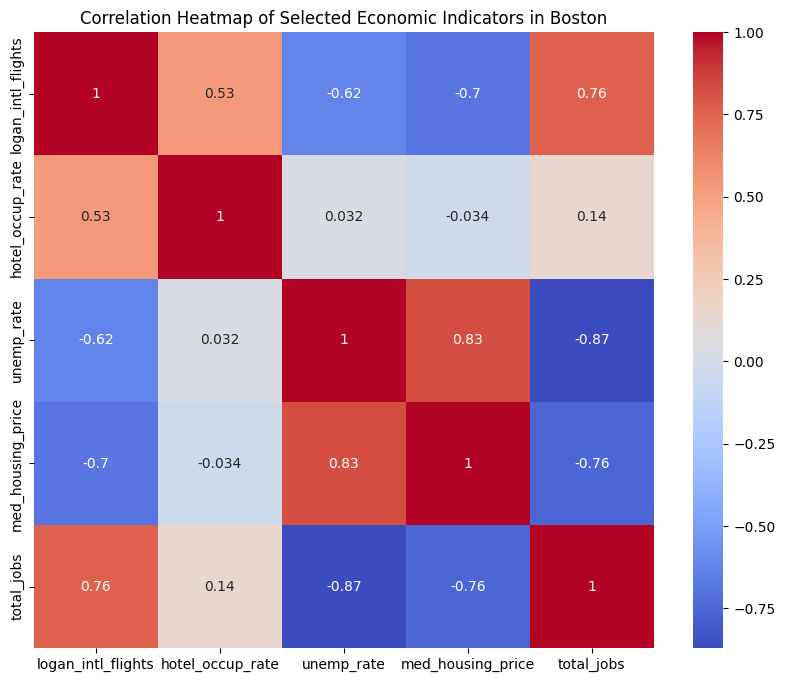

In [14]:
# Creating a heatmap to visualize the correlation between various economic indicators, including international flights and hotel occupancy rate
plt.figure(figsize=(10, 8))
sns.heatmap(df[['logan_intl_flights', 'hotel_occup_rate', 'unemp_rate', 'med_housing_price', 'total_jobs']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Economic Indicators in Boston')
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Defining the independent variables (predictors) and the dependent variable (target)
X = df[['total_jobs', 'unemp_rate', 'hotel_occup_rate', 'logan_intl_flights']]
y = df['med_housing_price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Fitting the model with the training data
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating the model's performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(11020483142.01, 0.7788840946754396)

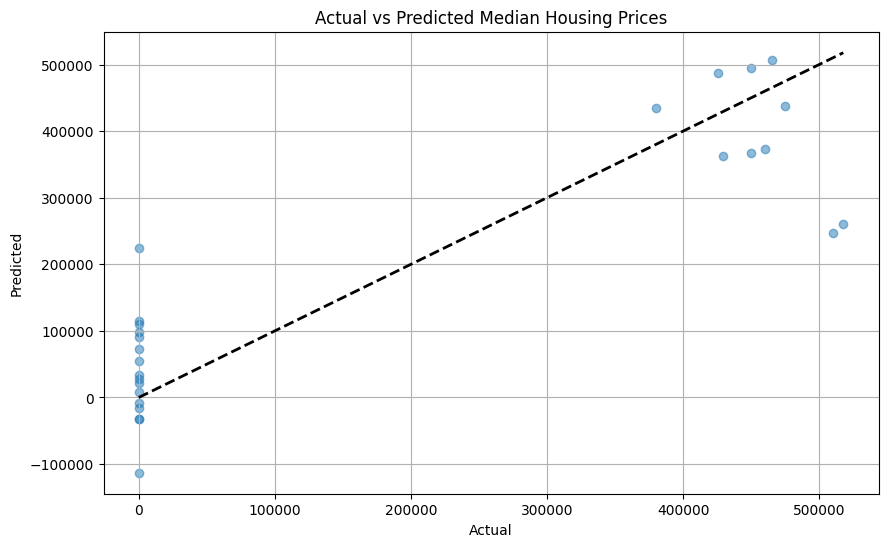

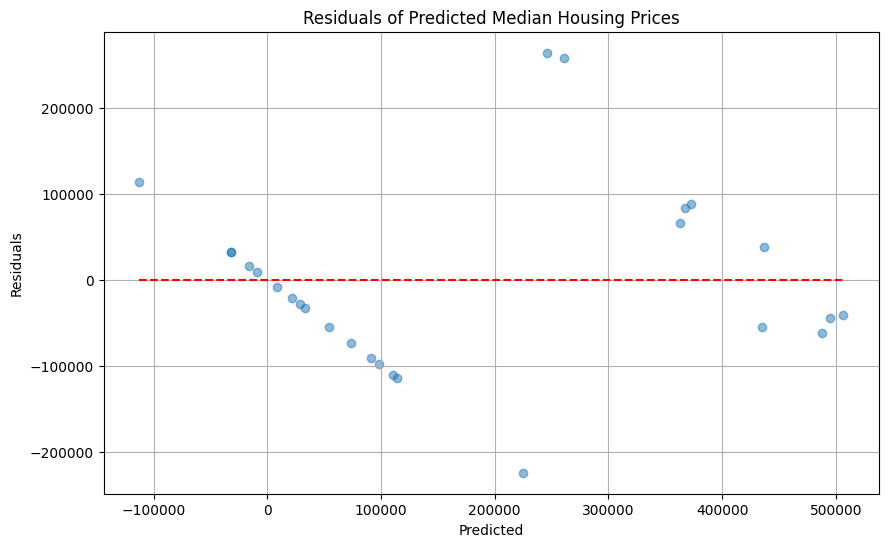

In [16]:
# Plotting the actual vs predicted housing prices for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2) # Line indicating perfect predictions
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Median Housing Prices')
plt.grid(True)
plt.show()

# Plotting the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals of Predicted Median Housing Prices')
plt.grid(True)
plt.show()


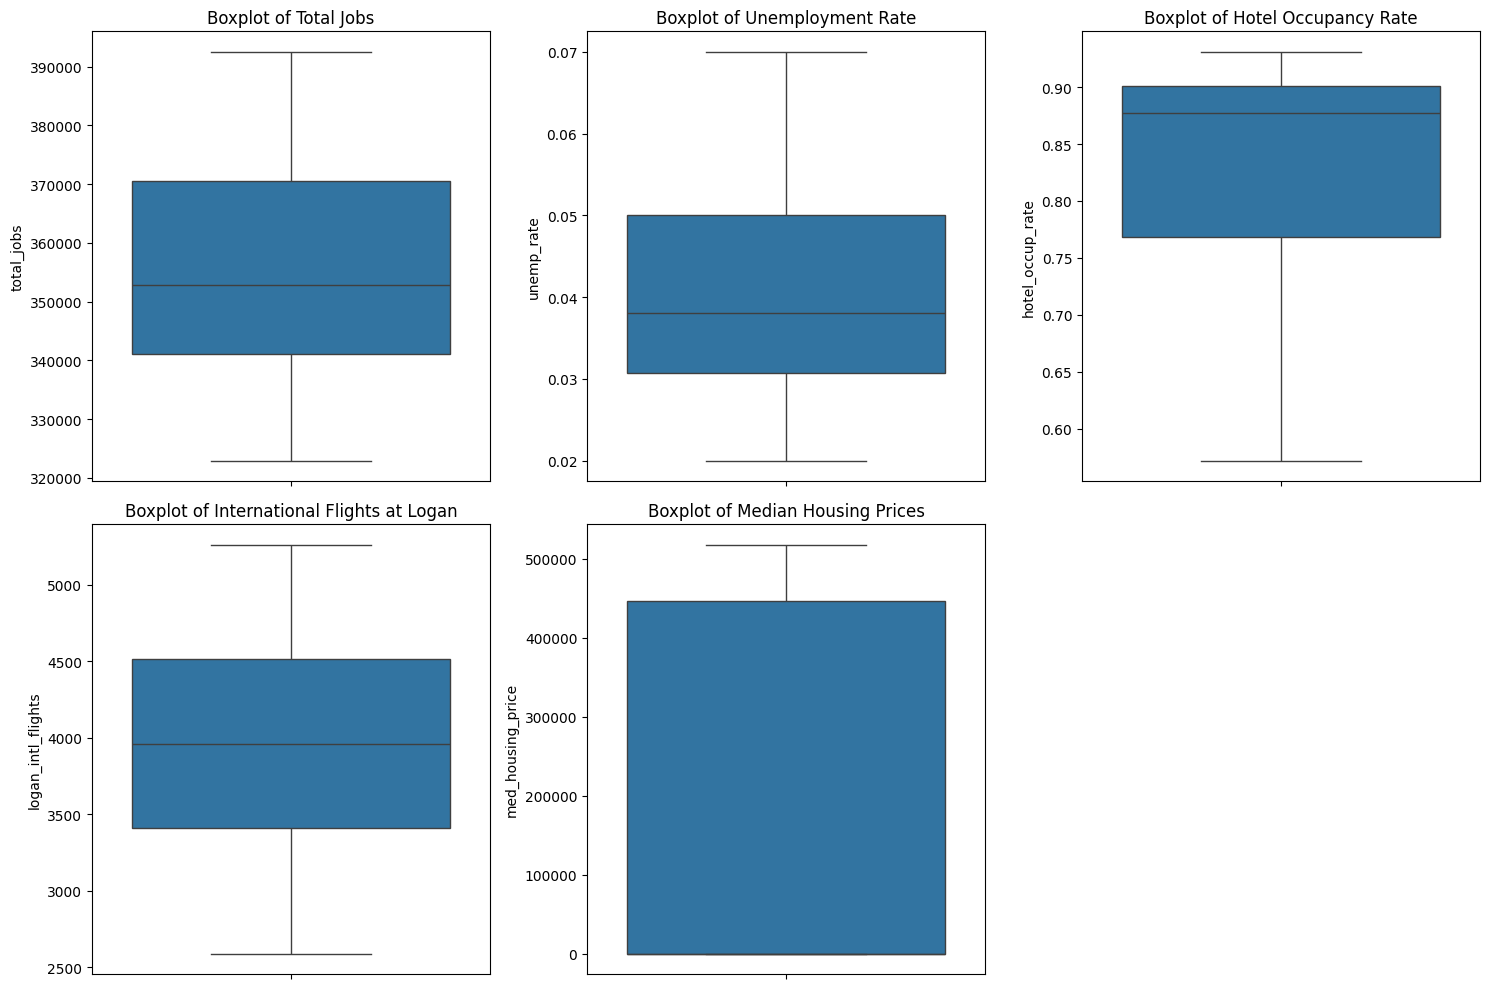

In [17]:
# Identifying potential anomalies in key economic indicators
# Using box plots to identify outliers in the dataset

plt.figure(figsize=(15, 10))

# Boxplot for total jobs
plt.subplot(2, 3, 1)
sns.boxplot(df['total_jobs'])
plt.title('Boxplot of Total Jobs')

# Boxplot for unemployment rate
plt.subplot(2, 3, 2)
sns.boxplot(df['unemp_rate'])
plt.title('Boxplot of Unemployment Rate')

# Boxplot for hotel occupancy rate
plt.subplot(2, 3, 3)
sns.boxplot(df['hotel_occup_rate'])
plt.title('Boxplot of Hotel Occupancy Rate')

# Boxplot for international flights at Logan
plt.subplot(2, 3, 4)
sns.boxplot(df['logan_intl_flights'])
plt.title('Boxplot of International Flights at Logan')

# Boxplot for median housing prices
plt.subplot(2, 3, 5)
sns.boxplot(df['med_housing_price'])
plt.title('Boxplot of Median Housing Prices')

plt.tight_layout()
plt.show()
